## Titans or Shoestrings - Government Size 

Gapminder aggregates a number of datasets from various sources around the world, outlining basic statics about our lives. Government plays a large role in any person's life. How big a role should the government play? 

There's a constant battle about size of government amongst Canadian and American politics. A big government is often associated with a grey bureaucrat sitting behind a pane of safety glass laboriously applying stamps in triplicate while a line-up winds out on to the street. There are others who view an active and appropriately sized government as a necessary member of any wealthy society, that the institution is as much a bastion of civilization as the tenets of its politics. Unfortunately, neither narrative gives an obvious answer to the question. 

Is there a better way to answer the question than more politics? Can some perspective give us some help here? 

Defining governmental success is monumentally difficult, but we can start investigatin some initial trends and ideas. A government does a lot of things and you can measure it a lot of ways, but if we were going out to the store to shop for a government, what would be the basic items we'd look for? 

Let's start with one of the core premises that any state gives its people - You'll live long, happy, secure lives with us. Oh, and you'll pay taxes. Lots of taxes. 

Taxes and life expectancy are any easy number to assess and record, but how do you quantify happiness, security? For the purposes of this investigation, I'm going to assume that we can answer those questions by "at least I'm not poor". Poverty represents a large indicator for insecurity and unhappiness, and is also relatively quantifiable. 

### Indicators

Initially, we will review four indicators: 
* Tax revenue, as a % of GDP 
* GDP per capita (US$, inflation adjusted)
* Poverty, as compared to nationally defined lines 
* Life expectancy

These indicators represent the size of government, general economic efficacy of the people there, their livelihood, and how long they can expect to enjoy that livelihood. These aren't perfect indicators, but they're a start. 

### Scope of Investigation

This investigation will be limited to simple statistics and graphics, for the purposes of exercise. 

### Where's all this data coming from?
Gapminders (https://www.gapminder.org/data/). Data was taken from their newer database, and at the time of this project, extends up to 2017/2018 depending on the data set. 


* *Life Expectancy*, https://www.gapminder.org/data/documentation/gd004/
* *Tax Revenue*, https://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS [Appears to be broken? Dig in later]
* *GDP per capita*, https://data.worldbank.org/indicator/NY.GDP.PCAP.KD [Appears to be broken? Dig in later]
* *Poverty, against national average*, http://go.worldbank.org/B53SONGPA0 [Also broken?] 



In [1]:
#usual imports and data grab
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from country_plot import country_plot

%matplotlib inline

df_life = pd.read_csv('data/life_expectancy_years.csv') #life expectancy data set
df_gdp = pd.read_csv('data/gdppercapita_us_inflation_adjusted.csv') #GDP per capita, in US$, inflation adjusted
df_tax = pd.read_csv('data/tax_revenue_percent_of_gdp.csv') # Tax revenue as a % of GDP 
df_pov = pd.read_csv('data/alternative_poverty_percent_below_nationally_defined_poverty.csv') # % of people living below national poverty lines
df_su = pd.read_csv('data/suicide_per_100000_people.csv') # Suicide deaths per 100 000 people 

df_life.name = 'Life Expectancy'
df_gdp.name = 'GDP Per Capita'
df_tax.name = 'Tax Revenue, % of GDP'
df_pov.name = 'National Poverty Indicator, %'
df_su.name = 'Suicide Rates per Capita'

# Data Cleaning

Let's see if we need to do any data cleaning for each data set. 

In [2]:
df_life.head(3), df_life.shape, df_life.dtypes.unique() #checking roughly how the data looks, its overall size and layout

(           geo  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...   \
 0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...    
 1      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...    
 2      Algeria  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  ...    
 
    2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
 0  55.7  56.2  56.7  57.2  57.7  57.8  57.9  58.0  58.4  58.7  
 1  75.9  76.3  76.7  77.0  77.2  77.4  77.6  77.7  77.9  78.0  
 2  76.3  76.5  76.7  76.8  77.0  77.1  77.3  77.4  77.6  77.9  
 
 [3 rows x 220 columns],
 (187, 220),
 array([dtype('O'), dtype('float64')], dtype=object))

Our dataset consists of 219 years of data, over 187 countries.  Are we missing any data? 

In [3]:
df_life.isnull().sum().sum() #checking how many missing values, in total, there are

516

Looks like we're missing about 516 datapoints.  Let's look at what we're missing.

In [4]:
df_life[df_life.isnull().any(axis=1)]

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
48,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.4,73.0,73.0,72.9,72.7,72.7,71.7,73.0,NaN,NaN
105,Marshall Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.5,63.7,63.9,64.1,64.3,64.5,64.7,65.0,NaN,NaN


Looks like we're missing some years of data from three countries. Not much to worry about here, so let's continue. 

In [5]:
df_gdp.head(3), df_gdp.shape, df_gdp.dtypes.unique(), df_gdp.isnull().sum().sum() #checking roughly how the data looks, its overall size and layout

(           geo    1960    1961    1962    1963    1964    1965    1966  \
 0  Afghanistan     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 1      Albania     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2      Algeria  2470.0  2080.0  1630.0  2130.0  2200.0  2280.0  2110.0   
 
      1967    1968   ...      2008    2009  2010    2011    2012    2013  \
 0     NaN     NaN   ...     445.0   525.0   553   569.0   630.0   634.0   
 1     NaN     NaN   ...    3780.0  3930.0  4090  4210.0  4280.0  4330.0   
 2  2240.0  2410.0   ...    4390.0  4390.0  4460  4500.0  4560.0  4600.0   
 
      2014    2015    2016    2017  
 0   630.0   620.0   618.0   618.0  
 1  4410.0  4520.0  4680.0  4870.0  
 2  4680.0  4760.0  4830.0  4830.0  
 
 [3 rows x 59 columns],
 (190, 59),
 array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object),
 2484)

Some more obvious missing data here. This isn't particularly surprising, given the fact some of these nations wouldn't exist as they do now.

There are some issues with datatype incongruency in this dataset, which I'd like to look at more carefully to see if it'll cause us any problems. It looks like it's just a difference between integers and floats, whcih

In [6]:
df_gdp[df_gdp.isnull().any(axis=1)]

,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0,618.0,618.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,43000.0,43900.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0,3580.0,3480.0
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15300.0,13300.0,12200,11800.0,12100.0,11900.0,12400.0,12800.0,13300.0,13600.0
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3630.0,3140.0,3220,3370.0,3610.0,3710.0,3830.0,3940.0,3930.0,4220.0
10,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5260.0,5640.0,5840,5770.0,5820.0,6080.0,6120.0,6120.0,5860.0,5810.0
12,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21600.0,20800.0,20700,20500.0,20900.0,21800.0,22400.0,22400.0,22300.0,22100.0
14,Barbados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16700.0,16000.0,16000,16000.0,16000.0,16000.0,15900.0,16000.0,16300.0,16500.0
15,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5560.0,5580.0,6030,6380.0,6490.0,6560.0,6660.0,6400.0,6230.0,6380.0


In [7]:
df_gdp.select_dtypes(include ='int64').nunique() #checking where our weird data is

2010    180
dtype: int64

Looks like our 2010 data is all ints. I'm going to swap them over because at this point, I don't have the experience to say if it'll cause a problem or not (I don't suspect that it will, but why risk it?)

In [8]:
df_gdp['2010'] =df_gdp['2010'].astype('float64'); #reassigning datatypes
df_gdp.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

On to the next set. 



In [9]:
df_tax.head(3), df_tax.shape, df_tax.dtypes.unique(), df_tax.isnull().sum().sum() #checking roughly how the data looks, its overall size and layout

(           geo  1972  1973  1974  1975  1976  1977  1978  1979  1980  ...   \
 0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 
     2008   2009   2010   2011   2012   2013   2014   2015  2016  2017  
 0   6.04   8.44   9.12   8.85   7.47   7.08   6.84   7.55   NaN   NaN  
 1    NaN    NaN    NaN  18.00  17.50  16.50  18.30  18.50  17.6   NaN  
 2  45.30  35.10  34.40  37.20    NaN    NaN    NaN    NaN   NaN   NaN  
 
 [3 rows x 47 columns],
 (161, 47),
 array([dtype('O'), dtype('float64')], dtype=object),
 3523)

More obvious missing data, but our datatypes look OK. 

In [10]:
df_pov.head(3), df_pov.shape, df_pov.dtypes.unique(), df_pov.isnull().sum().sum()#checking roughly how the data looks, its overall size and layout

(           geo  1985  1986  1987  1988  1989  1990  1991  1992  1993  ...   \
 0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 
    2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  
 0   NaN   NaN   NaN  35.8   NaN   NaN   NaN   NaN   NaN   NaN  
 1  12.4   NaN   NaN   NaN  14.3   NaN   NaN   NaN   NaN   NaN  
 2   NaN   NaN   NaN   5.5   NaN   NaN   NaN   NaN   NaN   NaN  
 
 [3 rows x 34 columns],
 (135, 34),
 array([dtype('O'), dtype('float64')], dtype=object),
 3682)

In [11]:
df_su.head(3), df_su.shape, df_su.dtypes.unique(), df_su.isnull().sum().sum()#checking roughly how the data looks, its overall size and layout

(                   geo  1950  1951  1952  1953  1954  1955  1956  1957  1958  \
 0              Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
 1  Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
 2            Argentina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
 
    ...   2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
 0  ...   4.06  5.34   NaN  3.08   NaN   NaN   NaN   NaN   NaN   NaN  
 1  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 2  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 
 [3 rows x 68 columns],
 (104, 68),
 array([dtype('O'), dtype('float64')], dtype=object),
 3976)

More missing data, but our datatypes look OK. How much non-NA data do we even have?

In [12]:
#percentage of data that's missing compared to all data
a = df_pov.isnull().sum().sum()
b = df_pov.count().sum()

miss = '{:.1%}'.format(a / (a+b))
print(miss)

80.2%


Not very much at all. Given that we're missing over 80% of the data in the dataset, I doubt we're going to get much interesting from it. I'll keep it around for the purposes of graphing, but we'll replace this as an overall indicator with the Suicide numbers.

As shown above, after cleaning, we're still missing a lot data from a number of countries. While there are avenues for cleaning data statistically, judging by the nature of the missing data, it would be unwise to handle them as anything other than null values. There appear to be countries with large chunks of missing data as well. We'll come back to that after I've finished massaging the data.

In [13]:
list_df = [df_life, df_gdp, df_tax, df_pov, df_su]

In [14]:
#checking how much data is missing in our sets
for frame in list_df:
    a = frame.isnull().sum().sum()
    b = frame.count().sum()
    
    miss = '{:.1%}'.format(a / (a+b))
    print(frame.name, '  ', miss)

Life Expectancy    1.3%
GDP Per Capita    22.2%
Tax Revenue, % of GDP    46.6%
National Poverty Indicator, %    80.2%
Suicide Rates per Capita    56.2%


In [15]:
for i in list_df:      #setting index to be geo column
    i.set_index('geo',inplace=True) 

There's no real point in displaying data that I don't have. As tax revenue is the item I want to show the most for, I should be using that as my limiting point for analysis. 

Time to set up some nicer looking plots, and test them against my country, and another country that's represented in all of the datasets. But let's get the mapping side of it sorted out first. 

In [16]:
df_tax.columns #checking what the earliest column is

Index(['1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object')

As our tax data only goes back to 1972, let's trim the rest of our datasets to start there for ease of graphing. I will be messing with the means for each country for those data sets, but I'm only really interested in the current comparison. So lets drop them.

In [17]:
y = '1972' #search date

#drop columns not included in the tax data (if possible)
for frame in list_df:
    if y in frame.columns.tolist():
        a = frame.columns.tolist()
        del a[a.index(y):len(a)]
        frame.drop(a,axis=1,inplace = True)
 


I haven't done anyhting with any missing data. In general, I'm OK with some missing data, but large chunks of missing data will misrepresent the actual representation of various data. Let's drop any countries that have limited data available. 

In [18]:
mod_list_df = [df_life, df_gdp, df_tax,df_su]

for frame in mod_list_df:
    print(frame.shape)
    a = int(len(frame.columns)*0.75)
    print(a)
    frame.dropna(axis='index',thresh=a,inplace=True)
    print(frame.shape)

(187, 47)
35
(187, 47)
(190, 46)
34
(140, 46)
(161, 46)
34
(47, 46)
(104, 45)
33
(34, 45)


Now that we've collated our data in to something meaningful, we need to deal with the differences in scales. The magnitude of each value is less important than its relative increase compared to its average value. This goes for life expectancy and GDP/Capita values. 

In [19]:
#attempts at iterating through my list of dataframes - need to dig in to this more to figure out why dataframes aren't iterating

# list_df = [[frame.apply(lambda x: (x-x.min()) / (x.max()-x.min()))] for frame in list_df]
#for frame in list_df:
   # frame = frame.apply(lambda x: (x-x.min()) / (x.max()-x.min()))

Let's normalize all of our data. Our poverty dataframe is already a percentage, and doesn't need the same adjustment. It does need to be converted. 

In [20]:
df_gdp = df_gdp.apply(lambda x: (x-x.min()) / (x.max()-x.min()))

In [21]:
df_life = df_life.apply(lambda x: (x-x.min()) / (x.max()-x.min()))

In [22]:
df_tax = df_tax.apply(lambda x: (x-x.min()) / (x.max()-x.min()))

In [23]:
df_su = df_su.apply(lambda x: (x-x.min()) / (x.max()-x.min()))

In [24]:
df_pov = df_pov.apply(lambda x: x/100)

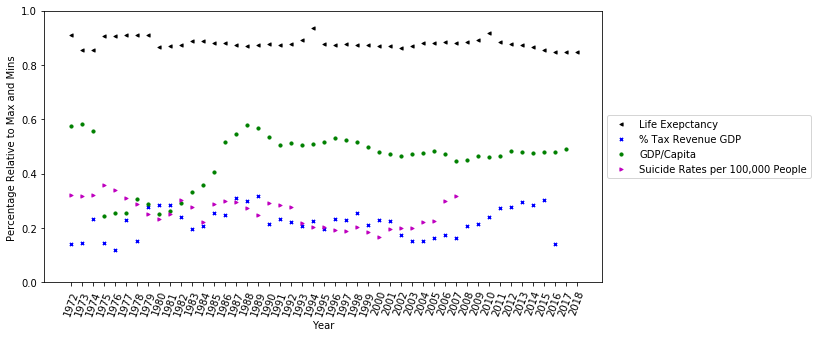

In [25]:
#setting up a plot for a dataset 
country = 'United States'

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

#some countries are not represented and need to not graph if they don't exist
if country in df_life.index:
    ax1.scatter(df_life.columns.tolist(),df_life.loc[country],s=10, c='k', marker="<", label = 'Life Exepctancy')
    
if country in df_tax.index:
    ax1.scatter(df_tax.columns.tolist(),df_tax.loc[country],s=10, c='b',marker ="x", label = '% Tax Revenue GDP')
    
if country in df_gdp.index:
    ax1.scatter(df_gdp.columns.tolist(), df_gdp.loc[country],s=10, c='g', marker="o", label = 'GDP/Capita')
    
if country in df_pov.index:
    ax1.scatter(df_pov.columns.tolist(), df_pov.loc[country],s=10, c='r', marker=",", label = '% of People Living Under National Poverty Markers')

if country in df_su.index:
    ax1.scatter(df_su.columns.tolist(), df_su.loc[country],s=10, c='m', marker=">", label = 'Suicide Rates per 100,000 People')

plt.ylim(0,1)
plt.xticks(rotation=70)
plt.xlabel('Year')
plt.ylabel('Percentage Relative to Max and Mins ')

plt.legend(loc='center left', bbox_to_anchor = (1,0.5));
plt.show()

Being a human being, staring at 100-something charts is probably going to be pretty pointless. 
Let's step back for a moment and try and determine what I really want to see here. 

I'f I'm going to be comparing tax revenues as a percentage of GDP against the other markers that I picked, then I want to make a series of graphs comparing each set for a bunch of different countries. Doing them for specific countries seems interesting, but perhaps not big enough. 

How about I consider splitting them in to quartiles? I'm not particularly ocncerned about outliers at this point - if someone is doing particularly well in this front, then it's probably worth looking at. If I compare them all by their quartiles, then I should be able to make some headway. 

In [26]:
#add mean column to datasets
df_gdp['mean'] = df_gdp.mean(axis=1);
df_life['mean'] = df_life.mean(axis=1);
df_tax['mean'] = df_tax.mean(axis=1);
df_pov['mean'] = df_pov.mean(axis =1);
df_su['mean'] = df_su.mean(axis =1);

list_df= [df_gdp, df_life, df_tax, df_pov, df_su]

In [27]:
#export data back to csvs for use by secondary functions
df_gdp.to_csv('data/gdp_norm.csv', index_label=False)
df_life.to_csv('data/life_norm.csv', index_label=False)
df_tax.to_csv('data/tax_norm.csv', index_label=False)
df_pov.to_csv('data/poverty_norm.csv', index_label=False)
df_su.to_csv('data/suicide_norm.csv', index_label=False)


### Finding Desirable Countries

Given that I'm trying to find the countries with the best fit for relative government size, I should see if the countries at the top of each of my major criteria have any overlap. 

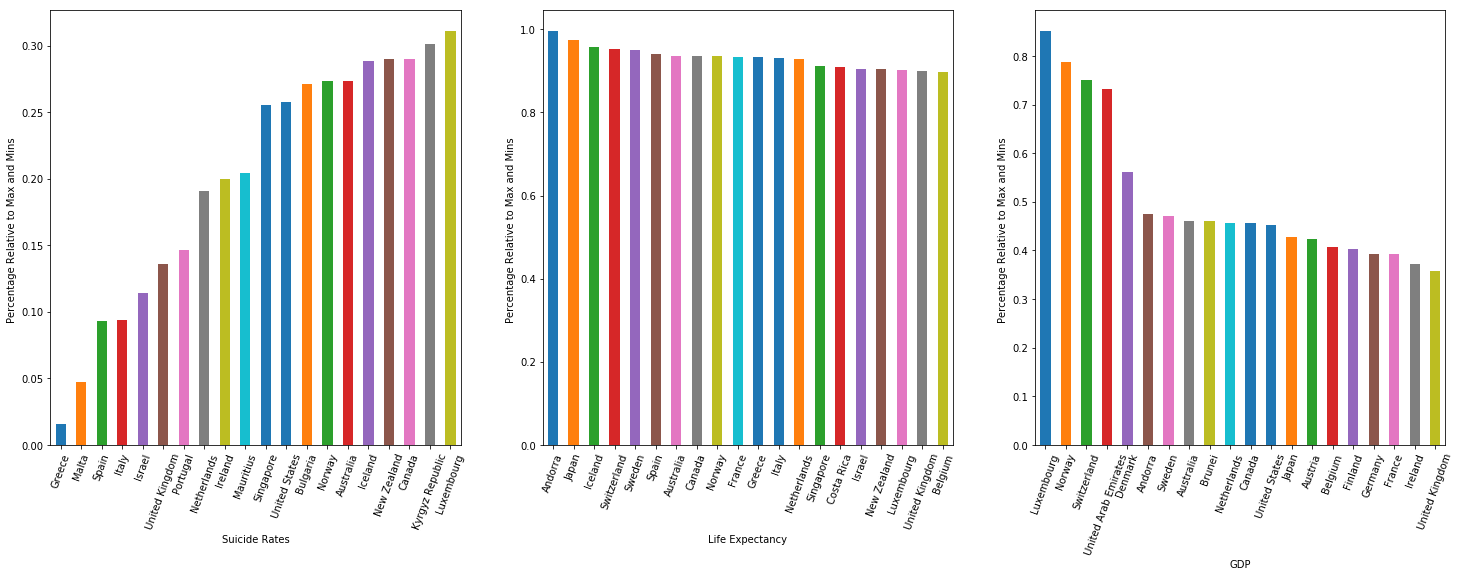

In [28]:
#need to plot GDP, Tax, and Life Expectancy next to one another to do some visual comparisons to find more interesting countries
number = 20; # number of countries to plot

fig = plt.figure(figsize=(25,8))
ax1 = fig.add_subplot(131,)
ax2= fig.add_subplot(132,)
ax3 = fig.add_subplot(133,)


#sort by largest gdp/cap
df_gdp.sort_values('mean', ascending = False)['mean'].iloc[:number].plot(kind='bar');
plt.xticks(rotation=70)
plt.xlabel('GDP')
plt.ylabel('Percentage Relative to Max and Mins ')
plt.subplot(ax2);

#sort by largest life expectancy
df_life.sort_values('mean', ascending = False)['mean'].iloc[:number].plot(kind='bar');
plt.xticks(rotation=70)
plt.xlabel('Life Expectancy')
plt.ylabel('Percentage Relative to Max and Mins ')
plt.subplot(ax1);

#sort by smallest suicide rates
df_su.sort_values('mean', ascending = True)['mean'].iloc[:number].plot(kind='bar'); 
plt.xticks(rotation=70)
plt.xlabel('Suicide Rates')
plt.ylabel('Percentage Relative to Max and Mins ')
plt.subplot(ax3);

In [39]:
#making a list of the indicators I want, to determine candidates with more than one entry in the top of those indicators
a = pd.Series()  

a = a.append(df_gdp.sort_values('mean', ascending = False)['mean'].iloc[:20])
a = a.append(df_life.sort_values('mean', ascending = False)['mean'].iloc[:20])
a = a.append(df_su.sort_values('mean', ascending = True)['mean'].iloc[:20])
a = a.reset_index()
a.head()

,index,0
0,Luxembourg,0.851780
1,Norway,0.788117
2,Switzerland,0.749538
3,United Arab Emirates,0.732773
4,Denmark,0.562127


We've generated a list of times that a country will show up in our criteria, which is of the top 20 countries in our selected indicators. I'm going to pick three out of the set that have multiple entries and do a deeper dive on each.

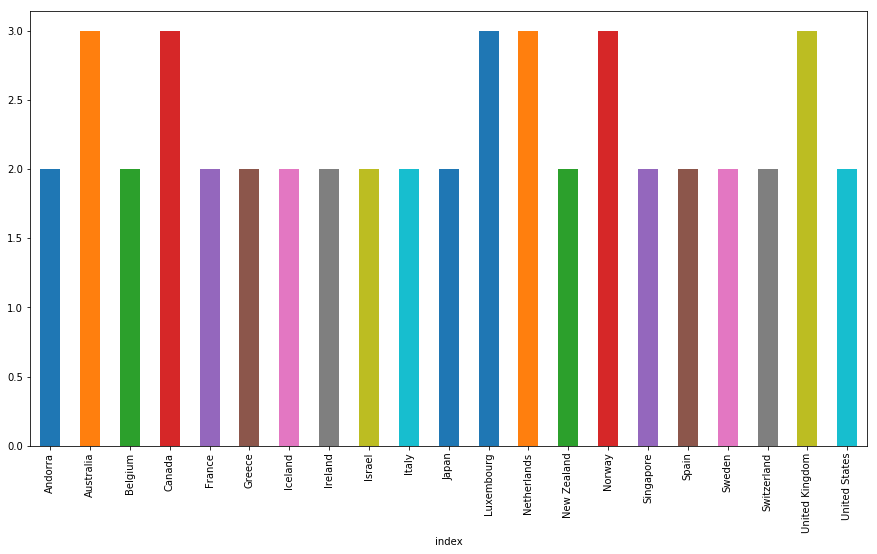

In [31]:
#plot a summary histogram to figure out some good targets to look at
b = a.groupby('index')[0].nunique()
c = b[b > 1]
c.plot(kind='bar', figsize = (15,8));

We've got some clear winners - Australia, Canada, Luxembourg, Netherlands, Norway, and the UK. For the purposes of preliminary analysis, let's chose the UK, Australia and the Netherlands to look at and assess. I'm also going to compare these countries to the United States, using the US as a benchmark. 

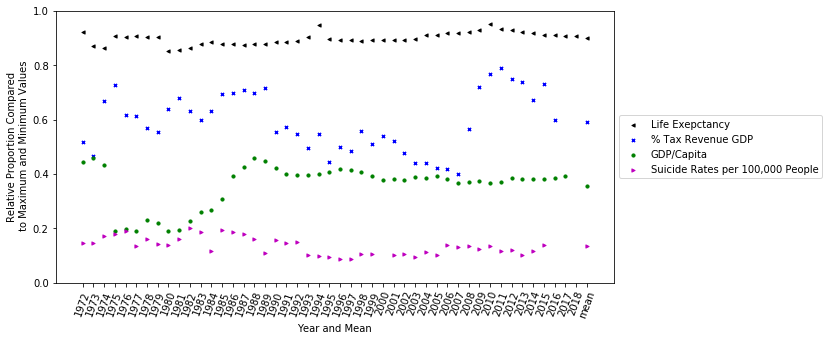

In [32]:
country_plot('United Kingdom');

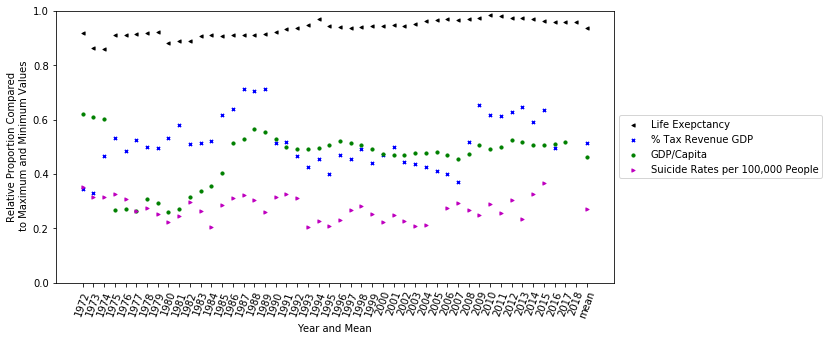

In [33]:
country_plot('Australia');

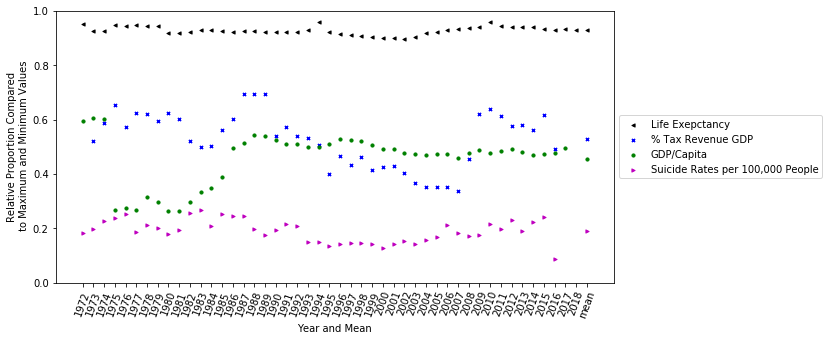

In [34]:
country_plot('Netherlands');

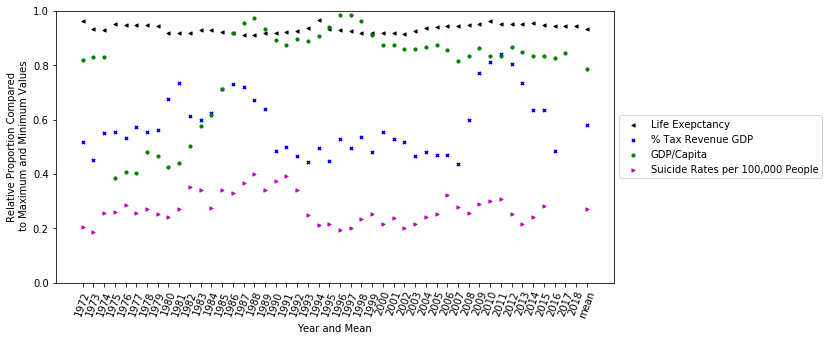

In [35]:
country_plot('Norway');

From the small sample size that we've reveiwed here, there are some trends worth noting. 

All of the selected countries follow very similar trends over the past 46 years.
  * Their life expectancy stays relatively even and high
  * GDP per capita trends relatively evenly. The big dips and recoveries tend occur around global economic events, intuitively.
  * Proportionaly, suicide rates are relatively stable 
  
Answering a question about how big a government should be from these plots is difficult. All of the selected countries show wide swings in the relative size of their tax revenues per capita, while maintaining top positions in our selected indicators.  Reviewing just the top of the pile doesn't give us any obvious indicators. 
     

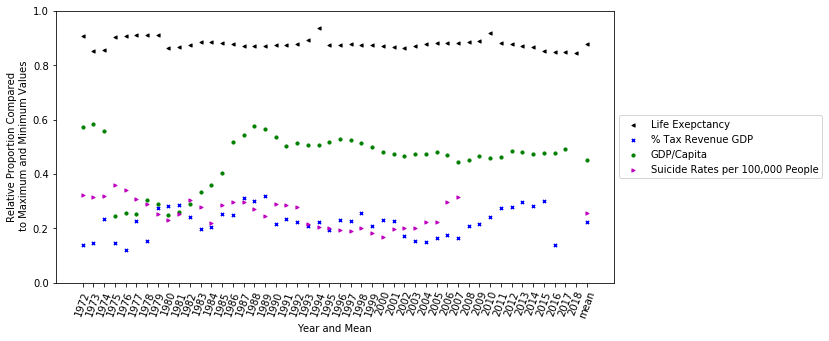

In [36]:
country_plot('United States');

The United States is one of the countries that did not make the top twenty countries for Life Expectancy. Their tax revenue per capita is also significnatly lower than the other riders of the top countries. Let's look at some examples of countries that are in the bracket just lower than our top twenty, and review a sample from there.

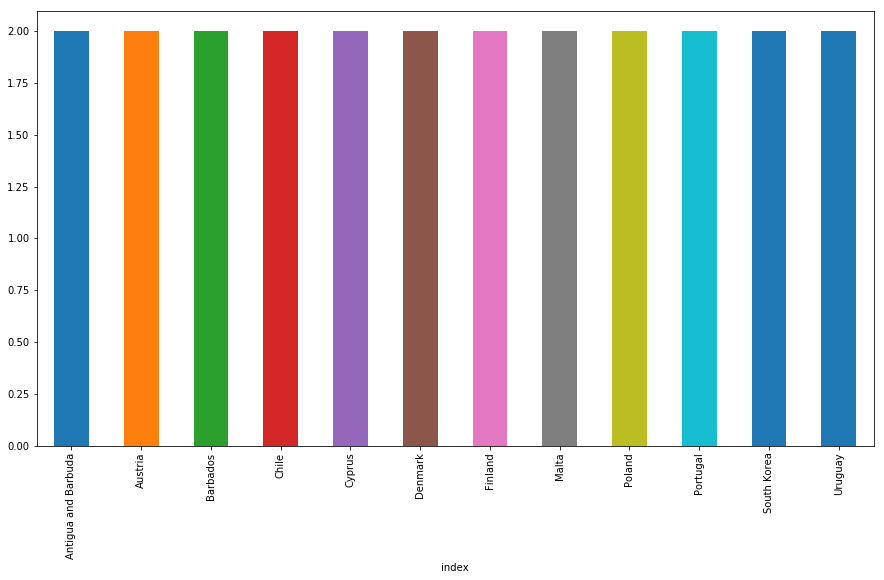

In [49]:
a = pd.Series()  

a = a.append(df_gdp.sort_values('mean', ascending = False)['mean'].iloc[20:50])
a = a.append(df_life.sort_values('mean', ascending = False)['mean'].iloc[20:50])
a = a.append(df_su.sort_values('mean', ascending = True)['mean'].iloc[20:50])
a = a.reset_index()

#plot a summary histogram to figure out some good targets to look at
b = a.groupby('index')[0].nunique()
c = b[b > 1]
c.plot(kind='bar', figsize = (15,8));

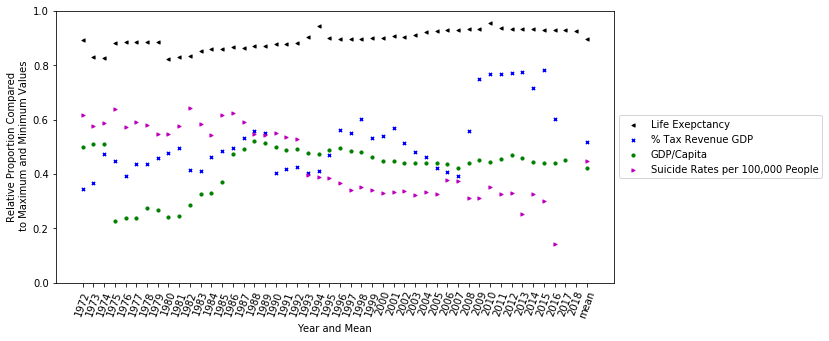

In [50]:
country_plot('Austria')

Austria marks a significantly higher suicide rate than the countries on the top end of the selected indicators. Life expectancies are somewhat lower. Government tax revenues are on the higher end of the selected countries, though the average over the last 46 years is similar to the others. 

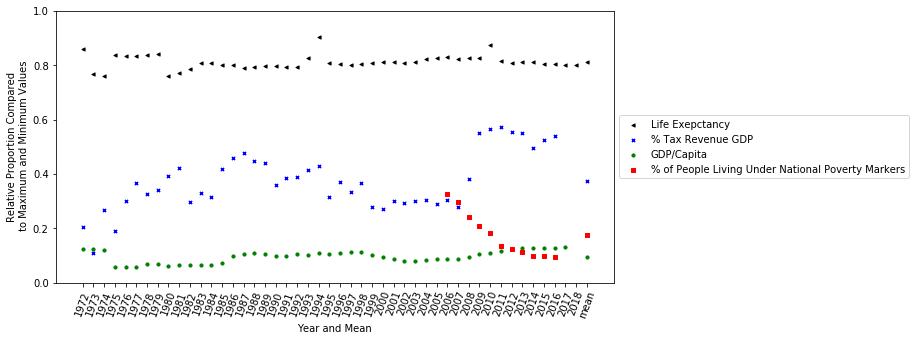

In [53]:
country_plot('Uruguay')

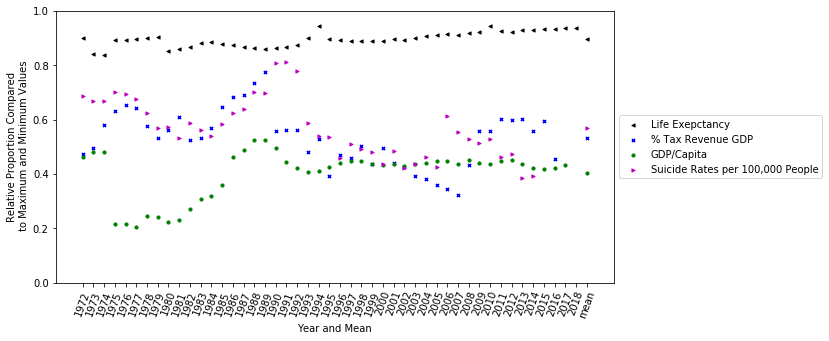

In [54]:
country_plot('Finland')

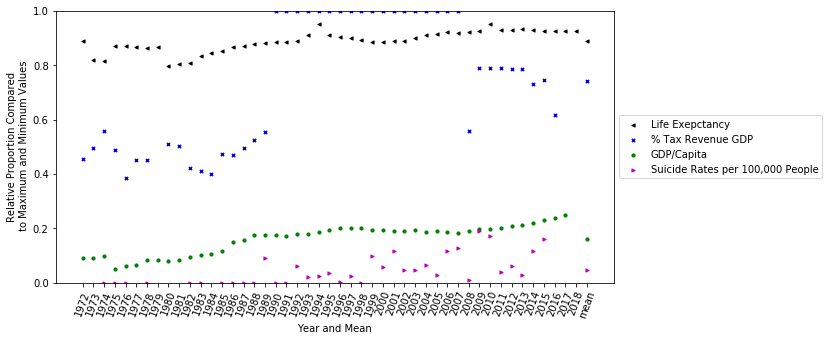

In [59]:
country_plot('Malta')

The disimilarities between these countries is much more apparent 

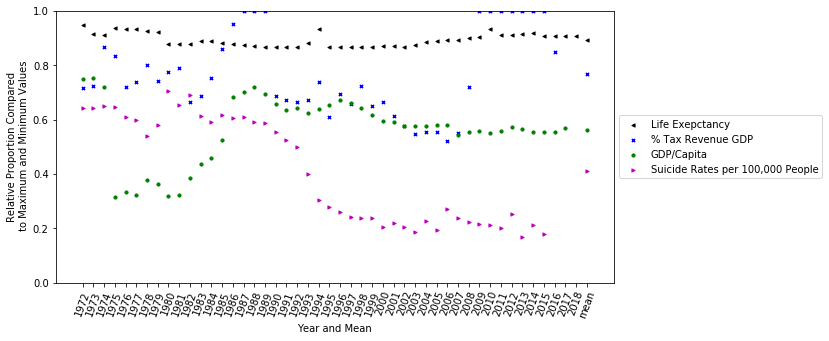

In [58]:
country_plot('Denmark')

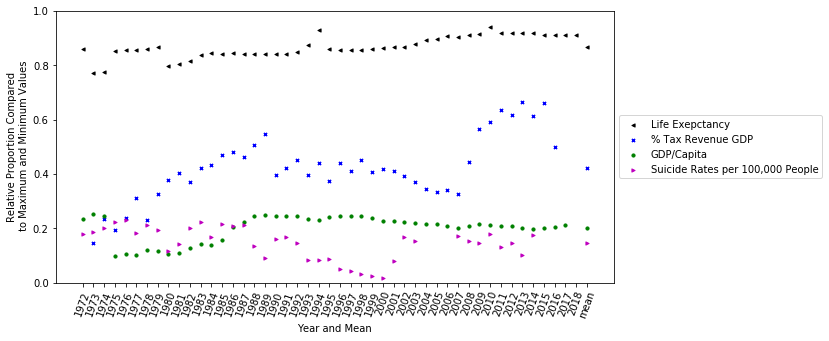

In [60]:
country_plot('Portugal')